## Installations
Besides the installations, please create two folders at the base level called: "histories" and "models"

In [3]:
!pip install sklearn

# 1.Import All Required Packages

In [4]:
# Import libraries# Impor 
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils

from keras import backend as K

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator

import re
import json
import pickle

# 2.Read Images from the data path

Upload the 4 datasets (original, obfuscated eyes, obfuscated mouth, obfuscated mouth and eyes) into 4 different folder named:  
* jaffe
* jaffe_eyes
* jaffe_mouth
* jaffe_both

And rerun this entire notebook 4 times after completion to get all results and scores. After finish each run, go to step 9 and update which model you've just trained


In [5]:
#Define Datapath
# data_path = './jaffe/'
# data_path = './jaffe_eyes/'
# data_path = './jaffe_mouth/'
data_path = './jaffe_both/'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]

for img in os.listdir(data_path):
    input_img=cv2.imread(f"{data_path}/{img}")
    input_img_resize=cv2.resize(input_img,(128,128))
    img_data_list.append(input_img_resize)
    
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

(213, 128, 128, 3)

# 3.Define the number of classes

In [6]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

i = 0

# Create regeular expressions for label extraction from image name
anger_regexp = re.compile(r'.AN\d.')
disgust_regexp = re.compile(r'.DI\d.')
fear_regexp = re.compile(r'.FE\d.')
happy_regexp = re.compile(r'.HA\d.')
neutral_regexp = re.compile(r'.NE\d.')
sad_regexp = re.compile(r'.SA\d.')
surprise_regexp = re.compile(r'.SU\d.')

for img in os.listdir(data_path):
    # print(img)
    if anger_regexp.search(img):
      labels[i] = 0
    elif disgust_regexp.search(img):
      labels[i] = 1
    elif fear_regexp.search(img):
      labels[i] = 2
    elif happy_regexp.search(img):
      labels[i] = 3
    elif neutral_regexp.search(img):
      labels[i] = 4
    elif sad_regexp.search(img):
      labels[i] = 5
    elif surprise_regexp.search(img):
      labels[i] = 6
    else:
      print("Can't extract label")
      exit(1)      
    i += 1

def getLabel(id):
    labels = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']
    return labels[id]


# 4.Convert the class label to one-hot encoding

In [7]:
# convert class labels to on-hot encoding# conve 
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

# 5.CNN Layer Set

In [8]:
# Defining the model

input_shape=img_data[0].shape
model = Sequential()

# Create model structure
model.add(Convolution2D(6, (5, 5), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(120, (5, 5)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

# 6.View Model Confifuration

In [9]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 6)       456       
                                                                 
 activation (Activation)     (None, 128, 128, 6)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2416      
                                                                 
 activation_1 (Activation)   (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                    

True

# 7.Train Model

In [10]:
# Training
hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
26/26 [==============================] - 12s 428ms/step - loss: 2.0514 - accuracy: 0.1271 - val_loss: 1.9451 - val_accuracy: 0.1250
Epoch 2/50
26/26 [==============================] - 10s 404ms/step - loss: 1.9460 - accuracy: 0.1215 - val_loss: 1.9469 - val_accuracy: 0.1562
Epoch 3/50
26/26 [==============================] - 9s 344ms/step - loss: 1.9426 - accuracy: 0.1878 - val_loss: 1.9461 - val_accuracy: 0.1875
Epoch 4/50
26/26 [==============================] - 6s 213ms/step - loss: 1.9034 - accuracy: 0.2541 - val_loss: 1.9250 - val_accuracy: 0.1875
Epoch 5/50
26/26 [==============================] - 6s 212ms/step - loss: 1.8268 - accuracy: 0.3039 - val_loss: 1.9335 - val_accuracy: 0.2500
Epoch 6/50
26/26 [==============================] - 6s 213ms/step - loss: 1.6982 - accuracy: 0.3591 - val_loss: 1.7503 - val_accuracy: 0.3438
Epoch 7/50
26/26 [==============================] - 6s 213ms/step - loss: 1.4789 - accuracy: 0.4309 - val_loss: 1.7427 - val_accuracy: 0.2500
Epoc

# 8.Result visualization

<Figure size 432x288 with 0 Axes>

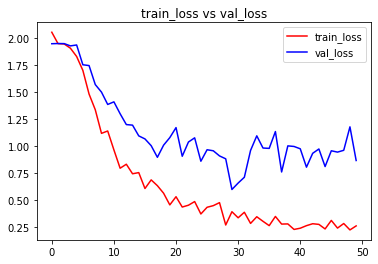

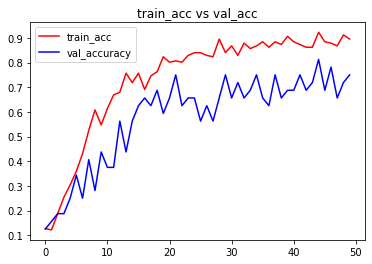

<Figure size 432x288 with 0 Axes>

In [11]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_accuracy')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 0.8637410998344421
Test accuracy: 0.75
(1, 128, 128, 3)
[[2.1945037e-01 6.4778280e-01 4.6017943e-03 6.7499830e-05 2.9105095e-06
  1.2809438e-01 1.8084152e-07]]
1
[[1. 0. 0. 0. 0. 0. 0.]]


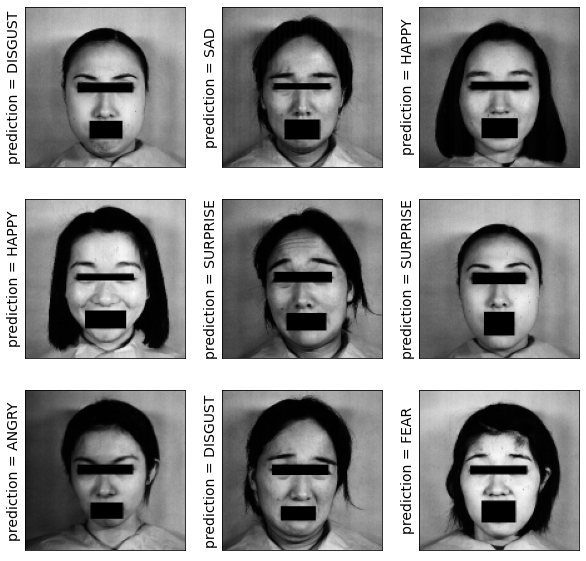

In [12]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))

print(np.argmax(model.predict(test_image)))

print(y_test[0:1])

res = []
for prediction in model.predict(X_test[:9]):
    res.append(np.round(np.argmax(prediction)))

plt.figure(figsize=(10, 10))

for i in range(0, 9):
    # print(res[i])
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)

# show the plot
plt.show()

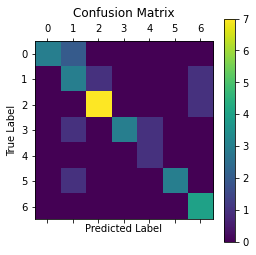

In [13]:
from sklearn.metrics import confusion_matrix
results = model.predict(X_test)
# print(np.where(y_test == 1)[1])
res = []
for prediction in results:
    res.append(np.round(np.argmax(prediction)))

cm = confusion_matrix(np.where(y_test == 1)[1], res)
plt.matshow(cm)
plt.title('Confusion Matrix',pad=15.0)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 9.Saving results

Change the `base_name` var in the next cell accordingly to the dataset you're working on

In [15]:
base_name = "both"
# Model Save
model.save_weights(f'models/model_weights_{base_name}.h5')
model.save(f'models/model_keras_{base_name}.h5')

# Save history
original_training_history = {
    'loss' : hist.history['loss'],
    'val_loss' : hist.history['val_loss'],
    'accuracy' : hist.history['accuracy'],
    'val_accuracy' : hist.history['val_accuracy'],
    'labels' : labels.tolist()
}

with open('histories/both_training_history.json', 'w') as outfile:
    json.dump(original_training_history, outfile)

In [16]:
# Predict on full dataset to compare results later
predictions = []
for prediction in model.predict(img_data):
    predictions.append(np.round(np.argmax(prediction)))

pickle.dump({'predictions' : predictions}, open(f'histories/{base_name}_predictions.pkl', 'wb'))

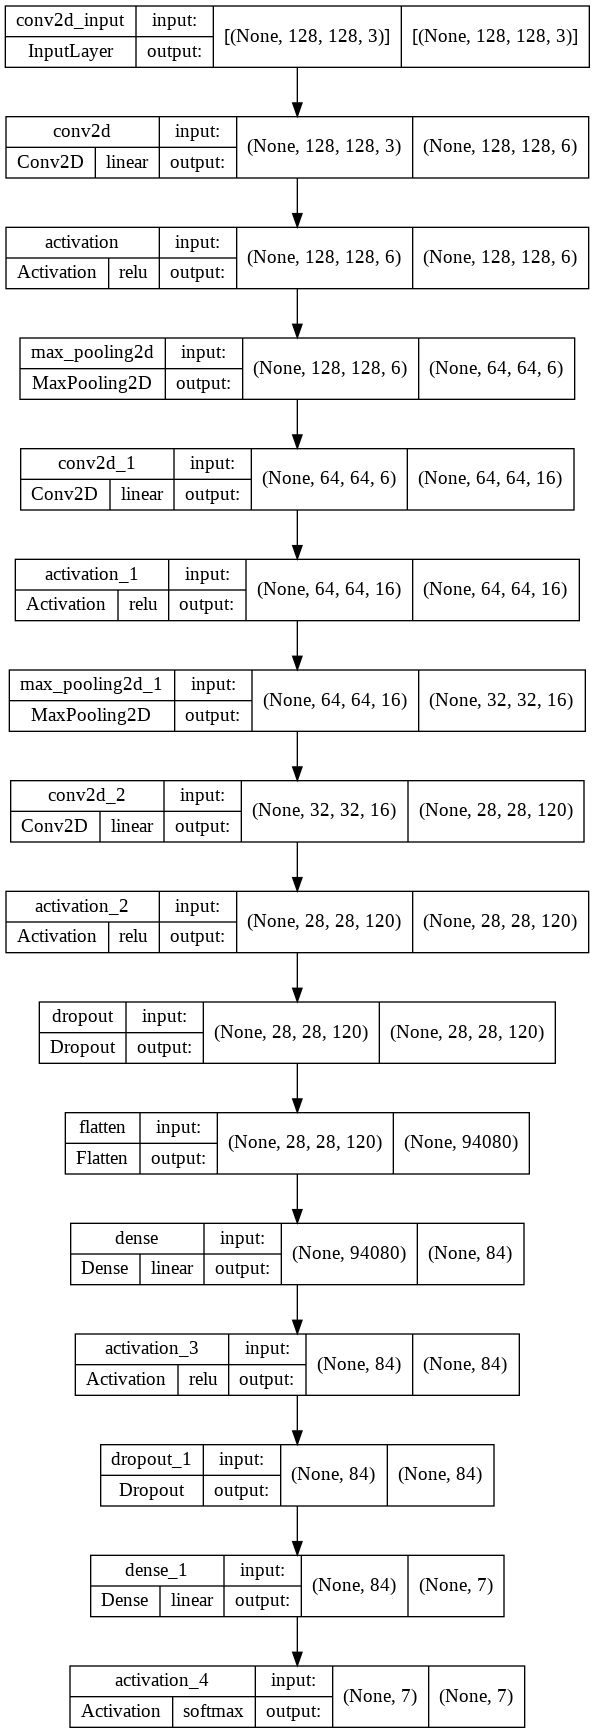

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_activations=True)

# 10.Conclusions
Run the other notebook from the provided github to get results and analysis